In [1]:
from importlib import reload
import sys, os
import re
from pathlib import Path
import pickle

import pandas as pd
import numpy as np
from pandas.api.types import is_numeric_dtype, is_datetime64_dtype, is_timedelta64_dtype
from scipy import stats
import datetime
import time
from natsort import natsorted, ns, natsort_keygen
from packaging import version

import copy
import itertools
import adjustText

import pyodbc

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.dates as mdates
from matplotlib.collections import PolyCollection
import matplotlib.patheffects as pe

#---------------------------------------------------------------------
sys.path.insert(0, os.path.realpath('..'))
import Utilities_config
#-----
from DOVSOutages_SQL import DOVSOutages_SQL
from DOVSOutages import DOVSOutages
from DOVSRepeatFinder import DOVSRepeatFinder
#---------------------------------------------------------------------
sys.path.insert(0, Utilities_config.get_sql_aids_dir())
import Utilities_sql
import TableInfos
from TableInfos import TableInfo
#---------------------------------------------------------------------
sys.path.insert(0, Utilities_config.get_utilities_dir())
import Utilities
import Utilities_df
from Utilities_df import DFConstructType
import Plot_General
#---------------------------------------------------------------------

In [2]:
date_0 = '2025-01-12'
date_1 = '2025-01-18'
#-------------------------
states      = None
opcos       = None
CI_NB_min   = None
premise_nbs = None
#--------------------------------------------------
save_dir_base = r'C:\Users\s346557\Documents\LocalData\dovs_check'
save_subdir   = f"{date_0.replace('-','')}_{date_1.replace('-','')}"
#-----
save_dir      = os.path.join(save_dir_base, save_subdir, r'AllOPCOs\DRFResults')
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

In [3]:
#--------------------------------------------------
start = time.time()
drf = DOVSRepeatFinder(
    mjr_mnr_cause   = None, 
    date_range      = [date_0, date_1], 
    states          = states, 
    opcos           = opcos, 
    CI_NB_min       = CI_NB_min,
    premise_nbs     = premise_nbs
)
print(time.time()-start)

!!!!! WARNING !!!!! NO OPCOs SELECTED!


C:\Users\s346557\Documents\Analysis\GenAn.py:662: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, conn_db, **read_sql_args)


88.97936296463013


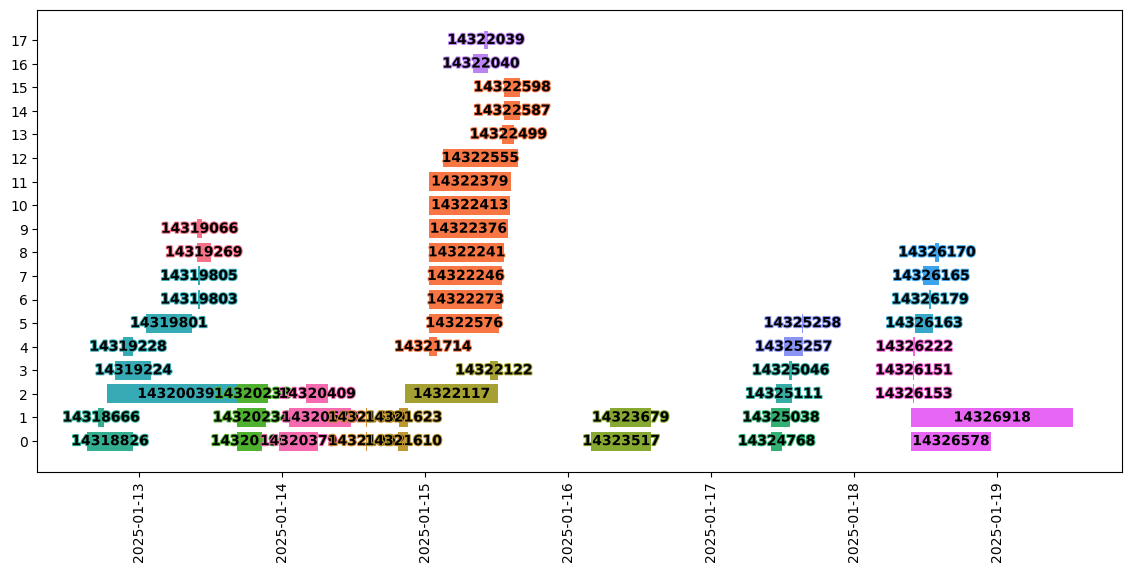

In [4]:
figaxs = drf.visualize_outages_general(
    max_delta_t          = pd.Timedelta('1days'), 
    mdates_loc           = None,  
    determine_mdates_loc = True, 
    outg_rec_nb_txt      = True, 
    y_col                = 'y', 
    overlap_grp_col      = 'overlap_grp', 
    t_beg_col            = 'DT_OFF_TS_FULL', 
    t_end_col            = 'DT_ON_TS', 
    outg_rec_nb_col      = 'OUTG_REC_NB', 
    x_tick_rot           = 90, 
    fig_num              = 0, 
    max_y_per_plot       = 20, 
    hard_max_y           = True, 
    save_path            = None, 
    close_all_figures    = False
)

In [5]:
drf.output_results(
    save_dir   = save_dir, 
    append_tag = save_subdir
)

In [6]:
assert(0)

AssertionError: 

In [ ]:
# fig_num = 0
# for PN_i in drf.dovs_df['PREMISE_NB'].unique().tolist()[20:30]:
#     fig,axs = drf.visualize_outages_for_PN(PN=PN_i, fig_num=fig_num)
#     fig_num+=1

In [ ]:
figaxs = drf.visualize_outages_general(max_y_per_plot=20, save_path=r'C:\Users\s346557\Downloads\DRF_TEST_1.pdf')

In [ ]:
import bottleneck

In [ ]:
np.__version__

In [ ]:
states=None
opcos=None
CI_NB_min=None
premise_nbs=['028585286']
#--------------------------------------------------
start = time.time()
drf_2 = DOVSRepeatFinder(
    mjr_mnr_cause   = None, 
    date_range      = None, 
    states          = states, 
    opcos           = opcos, 
    CI_NB_min       = CI_NB_min,
    premise_nbs     = premise_nbs
)
print(time.time()-start)

In [ ]:
fig,axs = drf_2.visualize_outages_for_PN(PN='028585286', mdates_loc = mdates.YearLocator(), max_delta_t=None)

In [ ]:
fig,axs = drf_2.visualize_outages_for_PN(PN='028585286')

In [ ]:
fig,axs = drf_2.visualize_outages_general()

In [ ]:
df = drf_2.dovs_gen_df.copy()
max_delta_t=max_delta_t
pd_beg_col='DT_OFF_TS_FULL'
pd_end_col='DT_ON_TS'
grp_by_col='overlap_grp'

In [ ]:
idk_0 = DOVSRepeatFinder.get_break_pt_idx_groups(
    df=df.copy(), 
    max_delta_t=max_delta_t, 
    pd_beg_col=pd_beg_col,
    pd_end_col=pd_end_col
)

In [ ]:
idk_1 = get_break_pt_idx_groups_NEW(
    df=df.copy(), 
    max_delta_t=max_delta_t, 
    pd_beg_col=pd_beg_col,
    pd_end_col=pd_end_col, 
    grp_by_col='overlap_grp'
)

In [ ]:
len(idk_0['idx_grps'])

In [ ]:
len(idk_1['idx_grps'])

In [ ]:
df

In [ ]:
    if grp_by_col is None:
        if pd_end_col is None:
            break_pt_bool_srs = df.reset_index()[pd_beg_col].diff(periods=1)>max_delta_t
        else:
            break_pt_bool_srs = (df.reset_index()[pd_beg_col]-df.reset_index().shift(1)[pd_end_col])>max_delta_t
        #-----
        break_pt_bool_srs.iloc[0]=True
    
        #-------------------------
        # Now, form the groups of indices which will go in each subplot
        idx_grps = []
        grp_i    = []
        for idx_i, bool_i in break_pt_bool_srs.items():
            if bool_i==True:
                if len(grp_i)>0:
                    idx_grps.append(grp_i)
                grp_i = []
            grp_i.append(idx_i)
        # Last group needs to be explicitly added
        assert(grp_i not in idx_grps) # Sanity check
        idx_grps.append(grp_i)
    #--------------------------------------------------
    else:
        # Create a temporary iloc column to store index location of rows
        tmp_iloc_col = Utilities.generate_random_string()
        assert(tmp_iloc_col not in df.columns.tolist())
        df[tmp_iloc_col] = range(df.shape[0])
        #-------------------------
        reduced_df = df.groupby([grp_by_col])[df.columns].apply(
            lambda x: pd.Series(
                data  = [x[pd_beg_col].min(), x[pd_end_col].max(), list(x[tmp_iloc_col])], 
                index = [pd_beg_col, pd_end_col, 'idxs_in_grp']
            )
        )
        reduced_df = reduced_df.sort_values(by=[pd_beg_col, pd_end_col])
        #-------------------------
        if pd_end_col is None:
            reduced_df['break_pt_bool'] = reduced_df[pd_beg_col].diff(periods=1)>max_delta_t
        else:
            reduced_df['break_pt_bool'] = (reduced_df[pd_beg_col]-reduced_df.shift(1)[pd_end_col])>max_delta_t
        #-----
        break_pt_bool_col_idx = Utilities_df.find_idxs_in_highest_order_of_columns(df=reduced_df, col='break_pt_bool', exact_match=True, assert_single=True)
        reduced_df.iloc[0, break_pt_bool_col_idx] = True

In [ ]:
reduced_df

In [ ]:
def exist_overlapping_events_for_xN_i(
    df_i, 
    intrvl_beg_col = 'DT_OFF_TS_FULL', 
    intrvl_end_col = 'DT_ON_TS'
):
    r"""
    """
    #--------------------------------------------------
    # If only one entry, cannot possibly be ovelaps!
    if df_i.shape[0]<=1:
        return False
    #--------------------------------------------------
    outg_intrvls = df_i.apply(lambda x: pd.Interval(x[intrvl_beg_col], x[intrvl_end_col]), axis=1).tolist()
    outg_intrvl_pairs = list(itertools.combinations(outg_intrvls, 2))
    do_pairs_overlap = [x[0].overlaps(x[1]) for x in outg_intrvl_pairs]
    #-----
    if any(do_pairs_overlap):
        return True
    return False

In [ ]:
start = time.time()
we = df_outage_OG.groupby('PREMISE_NB').apply(lambda x: exist_overlapping_events_for_xN_i(x))
end = time.time()-start

In [ ]:
df_i = df_outage_OG[df_outage_OG['PREMISE_NB']=='048178981'].copy()
intrvl_beg_col = 'DT_OFF_TS_FULL'
intrvl_end_col = 'DT_ON_TS'

In [ ]:
df_i = DOVSRepeatFinder.append_exists_overlapping_events_for_xN_i(df_i)
df_i

In [ ]:
df_b =  df_outage_OG.copy()

In [ ]:
df_b = DOVSRepeatFinder.append_exists_overlapping_events_for_xN_in_df(
    df                   = df_b, 
    return_overlaps_only = True
)

In [ ]:
set(df_b['PREMISE_NB'].unique()).symmetric_difference(set(we[we].index.tolist()))

In [ ]:
df_b = df_b.sort_values(by=['PREMISE_NB', 'OUTG_REC_NB'], ignore_index=True)
df_b = Utilities_df.move_cols_to_front(df=df_b, cols_to_move=['PREMISE_NB', 'overlaps', 'overlap_grp'])

In [ ]:
df_b

In [ ]:
df_b['PREMISE_NB'].isna()

In [ ]:
df_b.iloc[-1]['PREMISE_NB']